<a href="https://colab.research.google.com/github/jihyunjeongme/data-science/blob/master/%5B1%EC%9E%A5_%EC%86%8C%EA%B0%9C%5D_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://image.yes24.com/Goods/72219991/800x0" width=300 height=400>

## (개정판)파이썬 라이브러리를 활용한 머신러닝


In [0]:
# 첫 번쨰 애플리케이션: 붓꽃의 품종 분류

# 분류 문제
# 클래스: 출력될 수 있는 값(붓꽃의 종류) 
# 레이블(Label): 출력 Y, 품종

In [0]:
# 데이터 적재
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [0]:
# Bunch 클래스의 객체, iris_dataset
# 키와 값으로 구성

print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
# DESCR 키에는 데이터셋에 대한 간략한 설명이 들어 있습니다.

print(iris_dataset['DESCR'][:193]+"\n..")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
..


In [0]:
# traget_names의 값은 우리가 예측하려는 붓꽃 품종의 이름을 문자열 배열로 가지고 있습니다.

print('타깃의 이름', iris_dataset['target_names'])

타깃의 이름 ['setosa' 'versicolor' 'virginica']


In [0]:
# feater_names의 값은 각 특성을 설명하는 문자열 리스트 입니다.

print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# 실제 데이터는 target과 data 필드에 들어 있습니다.
# data는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치고 값을 가지고 있는 NumPy배열

print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [0]:
# data배열의 행은 개개의 꽃이 되며 열은 각 꽃에서 구한 네 개의 측정치 입니다.

print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [0]:
# 이 배열은 150개의 붓꽃 데이터를 가지고 있습니다.

iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
# 머신러닝에서 각 아이템은 '샘플', 속성은 '특성' 이라고 부름
# data 배열의 크기는 샘플의 수에 특성의 수를 곱한 값

print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
# 다섯 붓꽃의 꽃잎 폭은 모두 0.2cm 이고, 첫 번쨰 꽃이 가장 긴 5.1cm의 꽃받침을 가졌음.

In [0]:
# target 배열도 샘플 붓꽃의 품종을 담은 NumPy배열입니다.

print("target의 타입:", type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [0]:
# target은 각 원소가 붓꽃 하나에 해당하는 1차원 배열

print("target의 크기:", iris_dataset['target'].shape)

target의 크기: (150,)


In [0]:
# 붗꽃의 종류는 0에서 2까지의 정수로 기록

print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
# 숫자의 의미는 iris_dataset[target_names] 배열에서 확인 할 수 있음.

# 0은 setosa
# 1은 versicolor
# 2는 virginica

In [0]:
# 성과 측정: 훈련 데이터와 테스트 데이터

# 레이블된 데이터(150개의 붓꽃 데이터)를 두 그룹으로 나눔.
# 하나는 머신러닝 모델을 만들 떄 사용, 훈련데이터 혹은 훈련 세트
# 나머지는 모델이 얼마나 잘 작동하는지 측정하는 데 사용, 이를 테스트 데이터, 테스트 세트 or 홀드아웃 세트

# 사이킷런은 데이터를 섞어서 나눠주는 train_test_split 함수를 제공
# 이 함수는 전체 행중 75%를 레이블 데이터와 함께 훈련 세트로 뽑음
# 나머지 25%는 레이블 데이터와 함께 테스트 세트

# 훈련/테스트 세트 나누는건 다 다르지만, 전체의 25%를 테스트 세트로 사용하는 것은 일반적으로 좋은 선택

In [0]:
# X: 데이터
# y: 레이블

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  iris_dataset['data'], iris_dataset['target'], random_state=0)

In [0]:
# train_test_split 함수로 데이터를 나누기 전에 유사 난수 생성기를 사용해
# 데이터셋을 무작위로 섞어야 함.

# 이 함수르 여러 번 실행해도 결과가 똑같이 나오도록 유사 난수 생성기에 넣을 난수
# 초깃값을 random_state에 매개변수로 전달합니다. 이렇게 하면 항상 같은 결과를 출력합니다.

# 난수를 사용할 때는 항상 이렇게 random_state를 고정할 것

# train_test_split 함수의 반환값은 X_train, X_test, y_train, y_test 이며 모두
# NumPy 배열 입니다.

# 전체 데이터셋의 75%를, X_test는 나머지 25%를 담고 있습니다.

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [0]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


In [0]:
# 가장 먼 저 할 일: 데이터 살펴보기

# 시각화는 데이터를 조사하는 아주 좋은 방법, 산점도가 그중 하나.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32ec9c5be0>,
      dtype=object)

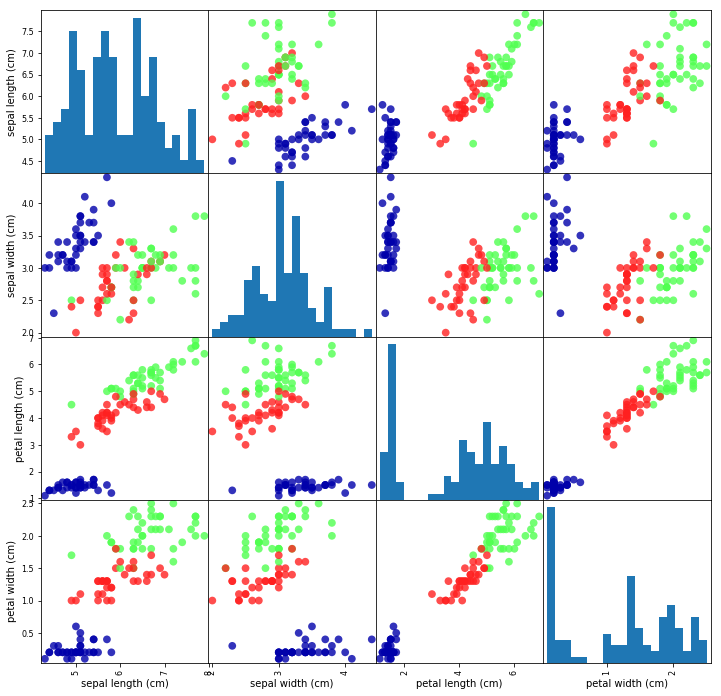

In [0]:

# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feture_names에 있는 문자열을 사용합니다.

!pip install mglearn

import pandas as pd
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# 데이터 프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(12,12), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [0]:
# 그래프를 보면 세 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분되는 것을 알 수 있음.
# 이것으로 보아 클래스를 잘 구분하도록 머신런닝 모델을 학습시킬 수 있을 것

In [0]:
# 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘

# k-최근접 이웃 분류기 사용
# 이 모델은 단순히 훈련 데이터를 저장하여 만들어짐. 
# k-최근접 이웃 알고리즘에서 k는 가장 가까운 이웃 '하나'가 아니라 훈련 데이터에서 새로운 데이터 포인트에
# 가장 가까운 'k개'의 이웃을 찾는다는 뜻(예를 들면 가장 가까운 세 개 혹은 다섯 개의 이웃)
# 그런 다음 이 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용합니다.

# 지금은 하나의 이웃만 사용하겠습니다.
# scikit-learn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 각각 구현 되어 있습니다.
# k-최근접 이웃 분류 알고리즘은 neighbors 모듈 아래 KNeighborsClassifier 클래스에 구현 되어 있습니다.

# 모델을 사용하려면 클래스로부터 객체를 만들어야 합니다.
# 이때 모델에 필요한 매개변수를 넣습니다. KNeighborsClassifier에서 가장 중요한 매개변수는 이웃의 개수 입니다.
# 우리는 1로 지정하겠습니다.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
# knn 객체는 훈련 데이터로 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화한것
# 또한 알고리즘이 훈련 데이터로부터 추출한 정보를 담고 있음.
# KNeighborsClassifier의 경우는 훈련 데이터 자체를 저장하고 있음.

In [0]:
# 훈련 데이터셋으로부터 모델을 만들려면 knn 객체의 fit 메서를 사용
# 이 메서드는 훈련 데이터인 NumPy 배열 X_train과 훈련 데이터의 레이블을 담고 있는 y_train을 매개변수로 받음

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# fit 메서드는 knn 객체 자체를 반환 합니다.(그리고 knn 객체 자체를 변경 시킵니다)
# 그래서 knn객체가 문자열 행태로 출력됩니다.

In [0]:
# 1.7.5 예측하기

# 이제 이 모델을 사용해서 정확한 레이블을 모르는 새 데이터에 대해 예측을 만들 수 있습니다.
# 꽃받침의 길이가 5cm, 폭이 2.9cm, 꽃임의 길이 1cm, 폭이 0.2cm 인 붓꽃을 보았다고 합시다.
# 이 붓꽃의 품종은 무엇일까요?

import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_nex.shape:", X_new.shape)

X_nex.shape: (1, 4)


In [0]:
# 붓꽃 하나의 측정값은 2차원 NumPy배열에 행으로 들어갑니다. 
# scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상합니다.

# 예측에는 knn 객체의 predict 메서드를 사용합니다.

prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:",
      iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [0]:
# 우리가 만든 모델이 새로운 붓꽃을 setosa 품종을 의미하는 클래스 0으로 예측함.
# 그런데 어떻게 이 모델의 결과를 신뢰할 수 있을까요?
# 이 샘플의 정확한 품종을 모른다는 사실이 모델을 구축하는 데 있어서 중요한 의미를 가집니다.

In [0]:
# 1.7.6 모델 평가하기
# 앞서 만든 테스트 세트를 사용할 떄 가 왔음.
# 테스트 데이터 있는 붓꽃의 품종을 예측하고 실제 레이블(품종)과 비교할 수 있습니다.
# 얼마나 많은 붓꽃 품종이 정확히 맞았는지 '정확도'를 계산하여 모델의 성능을 평가합니다.

y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)


테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [0]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [0]:
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [0]:
# 또 knn 객체의 socre 메서드로도 테스트 세트의 정확도를 계산 할 수 있습니다.

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [0]:
# 이 모델의 테스트 세트에 대한 정확도는 약 0.97 입니다.
# 97%의 품종을 정확히 맞혔다는 뜻.

In [0]:
# 1.8 요약 및 정리

# 품종을 구분해놓은 데이터셋을 사용 -> 지도학습
# 품종이 세 개이므로 세개의 클래스를 분류하는 문제
